# BEE 4750 Homework 1: Introduction to Using Julia

**Name**: Maya Yu

**ID**: mzy3

> **Due Date**
>
> Friday, 9/8/23, 9:00pm

## Overview

### Instructions

-   Problems 1-3 consist of a series of code snippets for you to
    interpret and debug. For Problems 1 and 2, you will be asked to
    identify relevant error(s) and fix the code. For Problem 3, the code
    works as intended; your goal is to identify the code’s purpose by
    following its logic.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [3]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/BEE 4750/hw01-mayazoeyu`


In [4]:
using Plots
using GraphRecipes
using LaTeXStrings

## Problems (Total: 40 Points)

### Problem 1 (8 points)

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [5]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0


#### Problem 1.1 (3 points)

Describe the logic error.

- The function prescribes a minimum value (min_value) of 0. However, each value in the array of values is greater than 0. Therefore, when the function's for loop is executed, each element in the array will be compared to min_value. Since the prescribed min_value is less than each value in the array, the if statement will determine that the min_value is 0. Therefore, the function will output that the min_value of the array is 0 when it is actually 78. To fix this logic error, we should instead set min_value to infinity, as it is greater than all other values in the array. 


#### Problem 1.2 (3 points)

Write a fixed version of the function.

In [6]:
#### Problem 1.2 Code
function minimum(array)
    min_value = Inf ### Change from min_value = 0 to min_value = Inf
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

minimum (generic function with 1 method)

#### Problem 1.3 (2 points)

Use your fixed function to find the minimum value of `array_values`.

In [7]:
minimum(array_values)

78

### Problem 2 (8 points)

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [8]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

average_grade = 94.4


#### Problem 2.1 (3 points)

Describe the logic and/or syntax error

- The function class_average accepts the argument grades. However, the variable average_grade stores the mean of student_grades. The function does not recognize the argument student_grades, as student_grades is defined outside of the function. Therefore, to fix this error, average_grade should instead evaulate the mean of grades. Lastly, the mean() function is not defined, as the mdodule Statistics is not loaded. We may solve this issue by manually evaulating the mean of grades – taking the sum and dividing by the length. In addition, the current @show command calls for average_grade. However, average_grade is not a variable that is currently stored in the workplace. Therefore, the code will demonstrate that average_grade is not defined. To fix this issue, when we execute the function, we should store the output of class_average(student_grades) into a variable called average_grade. This will define a variable for average_grade in our workspace and remove the undefined variable error. 

#### Problem 2.2 (3 points)

Write a fixed version of the code.

In [9]:
### Problem 2.2 

student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]

function class_average(grades)
  global average_grade = sum(grades)/length(grades) ### Change from mean(student_grades) to mean(grades), manually evaulate the mean
  return average_grade
end

class_average (generic function with 1 method)

#### Problem 2.3 (2 points)

Use your fixed code to compute the average grade for the class.

In [10]:
average_grade = class_average(student_grades) ### Execute function for student_grades and store value into average_grade
@show average_grade ### @show average_grade

average_grade = 94.4


94.4

### Problem 3 (8 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [11]:
function mystery_function(values)
    y = []
    for v in values
        if !(v in y)
            append!(y, v)
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


#### Problem 3.1 (4 points)

Explain the purpose of `mystery_function`.

- The purpose of 'mystery_function' is to evaluate a list of numbers 'v' and compare them to an empty vector 'y'. Then, for every 'v' in the list of numbers, we compare the number 'v' to all numbers in 'y'. If the number 'v' does not appear in 'y', we add the number 'v' to 'y'. In the end, 'y' will hold all unique numbers from our original list of values – removing any duplicates. 

#### Problem 3.2 (4 points)

Add comments to the code, explaining why and how it works. Refer to
[“Best Practices for Writing Code
Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
and remember that bad comments can be just as bad as no comments at all.
You do not need to add comments to every line (in fact, this is very bad
practice), but you should note the *purpose* of every “section” of code,
and add comments explaining any code sequences that you don’t
immediately understand.

In [12]:
#### List any unique, non-repeating values in a given vector 

function mystery_function(values)
    #### Create empty vector "y"
    y = []
    #### Find unique values in "v" and add them to "y"
    for v in values
        if !(v in y)
            append!(y, v)
        end
    end
    #### Output the vector "y" with unique values in "x" 
    return y
end

#### Execute the function to determine unique values in a given vector 
list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


### Problem 4 (16 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

#### Problem 4.1 (3 points)

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

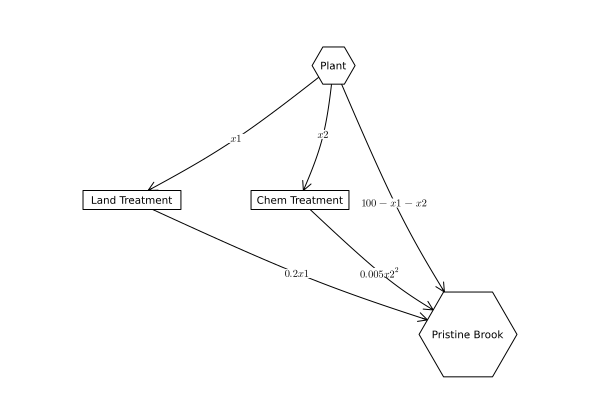

In [13]:
using GraphRecipes, Plots

A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"x1", (1,3) => L"x2", (1, 4) => L"100-x1-x2",(2, 4) => L"0.2 x1",(3, 4) => L"0.005 x2^2")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)

#### Problem 4.2 (4 points)

Formulate a mathematical model for the treatment cost and the amount of
YUK that will be discharged into Pristine Brook based on the wastewater
allocations. This is best done with some equations and supporting text
explaining the derivation. Make sure you include, as additional
equations in the model, any needed constraints on relevant values. You
can find some basics on writing mathematical equations using the LaTeX
typesetting syntax
[here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
and a cheatsheet with LaTeX commands can be found on the course
website’s [Resources
page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

First, we may define our constant variables. This includes the volumetric flow of wastewater leaving the plant and the concentration of YUK in the wastewater. We will define these variables as V and C respectively. 
$$ V = \frac{100 m^3}{day}; C = \frac{1 kg}{m^3} $$

We may determine the output flow of each wastewater treatment option. We will begin with the land treatment plant ("V_1") which removes 80% of YUK in soil: 
$$ V_1 = 0.2x_1 $$

Next, we will determine the output flow ("V_2")of the chemical treatment option which has an efficiency "e" of removal. However, to determine how much YUK enters Pristine Brook, we may evaluate the amount of YUK entering the Brook as 1-e: 
$$ e = 1-(1-0.005x_2) = 0.005x_2 $$
$$ V_2 = x_2(e) $$ 

Lastly, we will determine the output flow that goes directly from the plant to Pristine Brook (V_3). To do so, we will subtract the total volumetric flow from the plant (V) by the sum of the wastewater flows entering each treatment option (x_1 and x_2): 
$$ V_3 = V - x_1 - x_2 $$

From here, we may determine the total cost of the treatment options: 
$$ Cost = \frac{x_1^2}{20} + 1.5 x_2 $$

Now, we may determine the amount of YUK entering Pristine Brook ("A") from the various wastewater treatment options. To do so, we may multiple the sum of the volumetric outputs by the concentration of YUK in the wastewater: 
$$ A = C(V_1+V_2+V_3) $$ 

Lastly, we must note that A is constrained to be less than or equal to 20 kg/day, and our flow rates must be non-negative
$$ A ≤ 20\frac{kg}{day}, x_1 ≥ 0, x_2 ≥ 0 $$


#### Problem 4.3 (4 points)

Implement this systems model as a Julia function which computes the
resulting YUK concentration and cost for a particular treatment plan.
You can return multiple values from a function with a
[tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1), as
in:

In [14]:
function multiple_return_values(x, y)
    return (x+y, x*y)
end

a, b = multiple_return_values(2, 5)
@show a;
@show b;

a = 7
b = 10


Make sure you comment your code appropriately to make it clear what is
going on and why.

In [15]:
### Determine the YUK concentration and cost for treatment plans 

### Function requires the arguments x_1 and x_2 – representing the flow of wastewater going into the land 
### and chemical treatment options 

function treatment_outcomes(x_1, x_2)
   ### Calculate the output flow rates of each treatment plan based on their efficiency in removing YUK
    V_1 = 0.2*x_1               
    e = (0.005)*x_2
    V_2 = e*x_2
    V_3 = 100-x_1-x_2

    ### Calculate and return the total cost and YUK concentration for the treatment plan
    cost = x_1^2/20 + 1.5*x_2
    A = 1(V_1+V_2+V_3)
    return(cost, A)
end
    

treatment_outcomes (generic function with 1 method)

#### Problem 4.4 (5 points)

Use your function to experiment with some different combinations of
wastewater discharge and treatment. Can you find one that satisfies the
YUK effluent standard? What was the cost? You don’t have to find an
“optimal” solution to this problem, but what do you think would be
needed to find a better solution?

In [16]:
Total_Cost_1, YUK_Concentration_1 = treatment_outcomes(30, 20)
@show Total_Cost_1; 
@show YUK_Concentration_1;

Total_Cost_2, YUK_Concentration_2 = treatment_outcomes(60, 40)
@show Total_Cost_2; 
@show YUK_Concentration_2;

Total_Cost_3, YUK_Concentration_3 = treatment_outcomes(80, 20)
@show Total_Cost_3; 
@show YUK_Concentration_3;

Total_Cost_4, YUK_Concentration_4 = treatment_outcomes(90, 10)
@show Total_Cost_4; 
@show YUK_Concentration_4;

Total_Cost_1 = 75.0
YUK_Concentration_1 = 58.0
Total_Cost_2 = 240.0
YUK_Concentration_2 = 20.0
Total_Cost_3 = 350.0
YUK_Concentration_3 = 18.0
Total_Cost_4 = 420.0
YUK_Concentration_4 = 18.5


Based on the above experiments, it is clear that the land treatment option is much more efficient at treating the wastewater. However, it is also significantly more expensive than the chemical option. Based on the experiments, there are a variety of permutations that will satisfy the YUK effluent standard. For instance, if x_1 = 60 and x_2 = 40. 


If the plant considers discharging 60 m^3/day of wastewater into the land treatment facility and 40 m^3/day of wastewater into the chemical treatment facility, they would sastisfy the YUK efficient standard. The total YUK concentration discharged into Pristine Brook would be 20 kg/day. The associated cost is $240/day. To find a better solution, it would be helpful to understand some context regarding each treatment plant. For instance, how much wastewater can each plant treat? Are there any constraints on cost for each plant? Which factor is more important – cost or YUK concentration? 

## References

List any external references consulted, including classmates.